## CARREGAMENTO DOS DADOS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from matplotlib.colors import ListedColormap
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score,classification_report
from sklearn.neural_network import MLPClassifier
seed = 42
import seaborn as sns

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/IAA/ProjetoFinal/treino.csv')
test_data = pd.read_csv('/content/drive/MyDrive/IAA/ProjetoFinal/teste.csv')

## Análise dos dados

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      70000 non-null  int64  
 1   col_0   70000 non-null  float64
 2   col_1   70000 non-null  float64
 3   col_2   70000 non-null  float64
 4   col_3   70000 non-null  float64
 5   col_4   70000 non-null  float64
 6   col_5   70000 non-null  float64
 7   col_6   70000 non-null  float64
 8   col_7   70000 non-null  float64
 9   col_8   70000 non-null  float64
 10  col_9   70000 non-null  float64
 11  col_10  70000 non-null  float64
 12  col_11  70000 non-null  float64
 13  col_12  70000 non-null  float64
 14  col_13  70000 non-null  float64
 15  col_14  70000 non-null  float64
 16  col_15  70000 non-null  float64
 17  col_16  70000 non-null  float64
 18  col_17  70000 non-null  float64
 19  col_18  70000 non-null  float64
 20  col_19  70000 non-null  float64
 21  col_20  70000 non-null  float64
 22

In [ ]:
train_data["target"].value_counts()

0    32321
1     7168
2     6572
3     5880
6     4710
4     4685
5     4645
7     4019
Name: target, dtype: int64

In [ ]:
train_data

,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,gender,target
0,6550,383.962069,31.877400,20.940436,210.180396,67.665680,89.197493,51.509044,98.440855,26.133755,...,61.830444,8.370885,13.022698,30.039001,41.387833,1.694892,45.362438,baixo,male,2
1,66905,419.112165,37.721698,19.783738,276.141957,89.101999,56.345658,59.991099,99.279104,39.540056,...,93.476850,6.625610,12.006375,20.062669,31.910602,1.683118,46.894972,irrelevante,female,6
2,86340,285.626773,25.531304,15.359399,244.958947,78.950317,86.405010,50.592107,100.735481,38.039717,...,82.414287,8.161513,17.448588,28.372782,31.292485,1.283468,46.068444,medio,male,0
3,43383,290.917654,38.114595,17.762438,314.317800,98.343497,72.770055,44.436549,102.890685,35.385339,...,65.195244,8.620515,19.168315,28.528284,37.060180,2.137101,29.467236,baixo,male,6
4,10966,410.320248,34.132931,14.044501,272.234285,103.166055,78.884680,56.229949,66.615012,45.947103,...,55.280394,4.494784,14.382076,24.863610,31.371312,2.315021,72.456212,alto,male,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,58462,249.182757,36.463551,18.799871,273.124172,98.072060,102.331838,36.294692,108.161477,34.908596,...,68.536789,9.923963,15.771815,19.108302,39.360633,1.675572,39.526944,baixo,female,2
69996,2210,338.354607,37.502556,14.792935,295.035544,71.750000,92.231495,31.688837,122.143620,41.343417,...,86.687923,7.205988,18.251649,32.296000,37.779362,2.291866,48.661079,baixo,male,0
69997,86176,321.061642,34.398082,12.910206,306.557468,88.772265,102.887099,49.967804,122.709574,37.768015,...,72.180297,6.673999,16.728874,38.472984,43.001779,1.981686,74.700022,baixo,female,0
69998,3293,210.593723,36.607676,13.095601,329.916522,106.857311,79.276385,49.198864,95.880383,35.858462,...,74.924720,9.890982,16.712560,25.713209,42.481834,2.344057,59.540550,irrelevante,male,0


## PRÉ-PROCESSAMENTO

In [ ]:
# Substituir 'unknown' por NaN
train_data['gender'].replace('unknown', np.nan, inplace=True)
test_data['gender'].replace('unknown', np.nan, inplace=True)

from sklearn.impute import SimpleImputer
# Imputação usando a média
imputer = SimpleImputer(strategy='most_frequent')
train_data['gender'] = imputer.fit_transform(train_data[['gender']])
test_data['gender'] = imputer.fit_transform(test_data[['gender']])

# Substituir os NaNs imputados pelos valores mais frequentes
train_data['gender'].replace(np.nan, train_data['gender'].mode()[0], inplace=True)
test_data['gender'].replace(np.nan, test_data['gender'].mode()[0], inplace=True)

In [ ]:
train_data = train_data.drop(columns=["id"])
test_data = test_data.drop(columns=["id"])

In [ ]:
colunas_categoricas = ['gender', 'col_30']

In [ ]:
colunas_nao_categoricas_treino = [coluna for coluna in train_data.columns if coluna not in colunas_categoricas]
colunas_nao_categoricas_teste = [coluna for coluna in test_data.columns if coluna not in colunas_categoricas]


train_data = pd.get_dummies(train_data, columns=colunas_categoricas)
test_data = pd.get_dummies(test_data, columns=colunas_categoricas)

In [ ]:
temp_target = train_data["target"]

In [ ]:
scaler = StandardScaler()
train_data[colunas_nao_categoricas_treino] = scaler.fit_transform(train_data[colunas_nao_categoricas_treino])
test_data[colunas_nao_categoricas_teste] = scaler.fit_transform(test_data[colunas_nao_categoricas_teste])


In [ ]:
train_data["target"] = temp_target

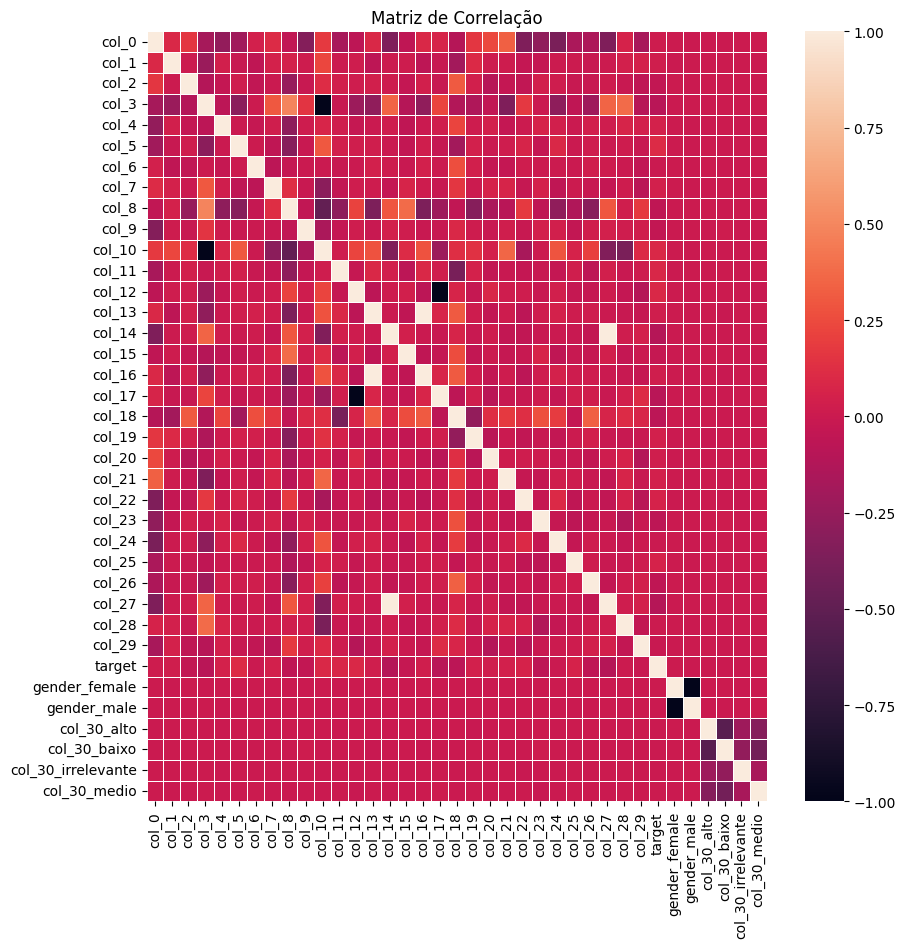

In [ ]:
# Calcular a matriz de correlação
correlation_matrix = train_data.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, linewidths=.6)
plt.title("Matriz de Correlação")
plt.show()

In [ ]:
train_data = train_data.drop(columns=['col_4','col_12', 'col_13', 'col_14', 'gender_female'])
test_data = test_data.drop(columns=['col_4','col_12', 'col_13', 'col_14', 'gender_female'])

## Treinamento dos modelos

In [ ]:
train, test = train_test_split(train_data, test_size=0.2, stratify=train_data['target'])
X_train = train.drop(columns=['target'])
y_train = train['target']
X_val = test.drop(columns=['target'])
y_val = test['target']

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=seed)
clf = clf.fit(X_train, y_train)

In [ ]:
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25857
           1       1.00      1.00      1.00      5734
           2       1.00      1.00      1.00      5258
           3       1.00      1.00      1.00      4704
           4       1.00      1.00      1.00      3748
           5       1.00      1.00      1.00      3716
           6       1.00      1.00      1.00      3768
           7       1.00      1.00      1.00      3215

    accuracy                           1.00     56000
   macro avg       1.00      1.00      1.00     56000
weighted avg       1.00      1.00      1.00     56000



In [ ]:
from sklearn.svm import SVC
clf2 = SVC(kernel="rbf", gamma="scale")
clf2.fit(X_train, y_train)

SVC()

In [ ]:
print(classification_report(y_train, clf2.predict(X_train)))

              precision    recall  f1-score   support

           0       0.68      0.98      0.80     25857
           1       0.70      0.58      0.63      5734
           2       0.72      0.50      0.59      5258
           3       0.71      0.49      0.58      4704
           4       0.78      0.36      0.49      3748
           5       0.79      0.40      0.53      3716
           6       0.76      0.40      0.53      3768
           7       0.79      0.33      0.47      3215

    accuracy                           0.70     56000
   macro avg       0.74      0.51      0.58     56000
weighted avg       0.71      0.70      0.67     56000



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf3 = KNeighborsClassifier(6)
clf3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
print(classification_report(y_train, clf3.predict(X_train)))

              precision    recall  f1-score   support

           0       0.67      0.99      0.80     25857
           1       0.70      0.60      0.65      5734
           2       0.72      0.52      0.61      5258
           3       0.74      0.48      0.58      4704
           4       0.78      0.35      0.48      3748
           5       0.79      0.38      0.52      3716
           6       0.80      0.36      0.50      3768
           7       0.81      0.30      0.44      3215

    accuracy                           0.70     56000
   macro avg       0.75      0.50      0.57     56000
weighted avg       0.72      0.70      0.67     56000



In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
eclf1 = VotingClassifier(estimators=[('tree', clf), ('svc', clf2), ('knn', clf3)], voting='hard')

In [ ]:
ensemble = eclf1.fit(X_train, y_train)

In [ ]:
predict_ensemble = ensemble.predict(X_val)

In [ ]:
print(classification_report(y_val, predict_ensemble))

              precision    recall  f1-score   support

           0       0.59      0.98      0.73      6464
           1       0.54      0.43      0.48      1434
           2       0.58      0.31      0.40      1314
           3       0.60      0.26      0.36      1176
           4       0.68      0.16      0.26       937
           5       0.73      0.17      0.28       929
           6       0.71      0.16      0.26       942
           7       0.71      0.11      0.20       804

    accuracy                           0.59     14000
   macro avg       0.64      0.32      0.37     14000
weighted avg       0.61      0.59      0.52     14000



In [ ]:
param_grid = {
    'tree__max_depth': [None, 10, 20, 30],  # Ajuste do hiperparâmetro max_depth para a árvore de decisão
    'svc__C': [0.1, 1.0, 10.0],
    'knn__n_neighbors': [3, 5, 7, 9, 11]
}

# grid_search = GridSearchCV(estimator=eclf1, param_grid=param_grid, cv=3)
eclf1 = RandomizedSearchCV(eclf1, param_grid, n_iter=10, cv=3, random_state=seed)
eclf1.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=VotingClassifier(estimators=[('tree',
                                                           DecisionTreeClassifier(random_state=42)),
                                                          ('svc', SVC()),
                                                          ('knn',
                                                           KNeighborsClassifier(n_neighbors=6))]),
                   param_distributions={'knn__n_neighbors': [3, 5, 7, 9, 11],
                                        'svc__C': [0.1, 1.0, 10.0],
                                        'tree__max_depth': [None, 10, 20, 30]},
                   random_state=42)

In [ ]:
best_eclf1 = eclf1.best_estimator_

y_pred = best_eclf1.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.99      0.73      6464
           1       0.61      0.45      0.52      1434
           2       0.64      0.33      0.44      1314
           3       0.67      0.25      0.36      1176
           4       0.71      0.16      0.27       937
           5       0.81      0.18      0.29       929
           6       0.78      0.18      0.30       942
           7       0.77      0.12      0.21       804

    accuracy                           0.60     14000
   macro avg       0.70      0.33      0.39     14000
weighted avg       0.64      0.60      0.53     14000

Acurácia: 0.5965714285714285


In [ ]:
pred_final = best_eclf1.predict(test_data)

In [ ]:
pred_final

array([0, 2, 0, ..., 0, 0, 0])

In [ ]:
ids = list(range(len(pred_final)))
df = pd.DataFrame({'id': ids, 'target': pred_final})

nome_arquivo = 'test_LucasFerreira.csv'
df.to_csv(nome_arquivo, index=False)

## MLP

In [ ]:
clf4 = MLPClassifier(max_iter=1000)
clf4.fit(X_train, y_train)

MLPClassifier(max_iter=1000)

In [ ]:
print(classification_report(y_train, clf4.predict(X_train)))

              precision    recall  f1-score   support

           0       0.69      0.93      0.79     25857
           1       0.53      0.46      0.49      5734
           2       0.49      0.42      0.45      5258
           3       0.49      0.38      0.43      4704
           4       0.47      0.25      0.33      3748
           5       0.51      0.25      0.33      3716
           6       0.46      0.32      0.37      3768
           7       0.45      0.25      0.32      3215

    accuracy                           0.62     56000
   macro avg       0.51      0.41      0.44     56000
weighted avg       0.58      0.62      0.58     56000



In [ ]:
pred_final_mlp = clf4.predict(test_data)
pred_final_mlp

array([0, 4, 6, ..., 6, 0, 0])

In [ ]:
# Criar um DataFrame com as colunas 'id' e 'target'
df = pd.DataFrame({'id': ids, 'target': pred_final_mlp})

# Salvar o DataFrame em um arquivo CSV
nome_arquivo = 'predicoes.csv'
df.to_csv(nome_arquivo, index=False)

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,),(64,32)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
clf4_opt = RandomizedSearchCV(clf4, parameter_space, n_iter=10, cv=3, random_state=seed)
clf4_opt.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=MLPClassifier(max_iter=1000),
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'alpha': [0.0001, 0.05],
                                        'hidden_layer_sizes': [(10, 30, 10),
                                                               (20,),
                                                               (64, 32)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['sgd', 'adam']},
                   random_state=42)

In [ ]:
print('Best parameters found:\n', clf4_opt.best_params_)

Best parameters found:
 {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (20,), 'alpha': 0.05, 'activation': 'relu'}


In [ ]:
print(classification_report(y_train, clf4_opt.predict(X_train)))

              precision    recall  f1-score   support

           0       0.59      0.94      0.73     25857
           1       0.35      0.29      0.32      5734
           2       0.30      0.22      0.25      5258
           3       0.30      0.18      0.23      4704
           4       0.30      0.07      0.11      3748
           5       0.32      0.09      0.14      3716
           6       0.29      0.08      0.12      3768
           7       0.29      0.06      0.09      3215

    accuracy                           0.52     56000
   macro avg       0.34      0.24      0.25     56000
weighted avg       0.44      0.52      0.44     56000



In [ ]:
best_params = {
    'solver': 'adam',
    'learning_rate': 'adaptive',
    'hidden_layer_sizes': (20,),
    'alpha': 0.05,
    'activation': 'relu'
}

best_clf4 = MLPClassifier(
    solver=best_params['solver'],
    learning_rate=best_params['learning_rate'],
    hidden_layer_sizes=best_params['hidden_layer_sizes'],
    alpha=best_params['alpha'],
    activation=best_params['activation'],
    max_iter = 1000
)

In [ ]:
best_clf4.fit(X_train, y_train)

MLPClassifier(alpha=0.05, hidden_layer_sizes=(20,), learning_rate='adaptive',
              max_iter=1000)

In [ ]:
print(classification_report(y_train, best_clf4.predict(X_train)))

              precision    recall  f1-score   support

           0       0.59      0.94      0.72     25857
           1       0.35      0.29      0.32      5734
           2       0.30      0.19      0.23      5258
           3       0.33      0.21      0.26      4704
           4       0.30      0.08      0.12      3748
           5       0.31      0.05      0.09      3716
           6       0.27      0.12      0.17      3768
           7       0.26      0.04      0.06      3215

    accuracy                           0.52     56000
   macro avg       0.34      0.24      0.25     56000
weighted avg       0.44      0.52      0.44     56000



In [ ]:
print(classification_report(y_val, best_clf4.predict(X_val)))

              precision    recall  f1-score   support

           0       0.59      0.93      0.72      6464
           1       0.34      0.29      0.31      1434
           2       0.29      0.18      0.22      1314
           3       0.28      0.19      0.23      1176
           4       0.26      0.07      0.10       937
           5       0.24      0.04      0.07       929
           6       0.26      0.11      0.15       942
           7       0.24      0.03      0.06       804

    accuracy                           0.51     14000
   macro avg       0.31      0.23      0.23     14000
weighted avg       0.42      0.51      0.43     14000



## modelo final

In [ ]:
voting_classifier = VotingClassifier(estimators=[
    ('mlp', best_clf4),
    ("vtc", best_eclf1)
], voting='hard')

In [ ]:
voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('mlp',
                              MLPClassifier(alpha=0.05,
                                            hidden_layer_sizes=(20,),
                                            learning_rate='adaptive',
                                            max_iter=1000)),
                             ('vtc',
                              VotingClassifier(estimators=[('tree',
                                                            DecisionTreeClassifier(max_depth=10,
                                                                                   random_state=42)),
                                                           ('svc', SVC(C=10.0)),
                                                           ('knn',
                                                            KNeighborsClassifier(n_neighbors=7))]))])

In [ ]:
print(classification_report(y_train, voting_classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71     25857
           1       0.53      0.39      0.45      5734
           2       0.55      0.25      0.35      5258
           3       0.63      0.18      0.28      4704
           4       0.65      0.09      0.16      3748
           5       0.78      0.08      0.14      3716
           6       0.79      0.07      0.12      3768
           7       0.94      0.03      0.05      3215

    accuracy                           0.56     56000
   macro avg       0.68      0.26      0.28     56000
weighted avg       0.62      0.56      0.46     56000



In [ ]:
print(classification_report(y_val, voting_classifier.predict(X_val)))

              precision    recall  f1-score   support

           0       0.53      0.99      0.69      6464
           1       0.47      0.31      0.37      1434
           2       0.44      0.16      0.24      1314
           3       0.52      0.11      0.19      1176
           4       0.39      0.04      0.07       937
           5       0.74      0.06      0.10       929
           6       0.56      0.03      0.06       942
           7       0.89      0.02      0.04       804

    accuracy                           0.52     14000
   macro avg       0.57      0.22      0.22     14000
weighted avg       0.54      0.52      0.41     14000

